## Impute cruise time data using neighboring historical cruise time

* Do not process data here. Only focus on the heat maps below
* Process data in the compute_ notebook of the same name

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
cruise_time_15m = pd.read_csv('../data/cruise_time_15m.csv')
cruise_time_imputed_15m = pd.read_csv('../data/cruise_time_imputed_15m.csv')

## Pre vs Post imputation with 15 minute interval - by minutes

Text(767.7272727272725, 0.5, 'timestamp')

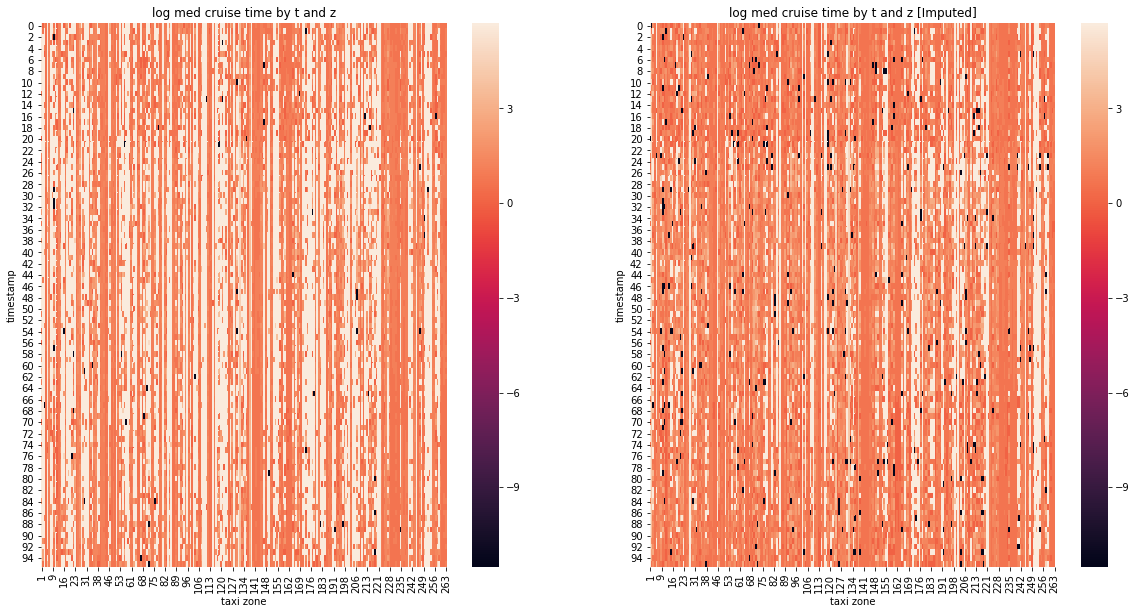

In [4]:
cruise_df = cruise_time_15m.copy()
cruise_df['med_cruise_time'] = np.log(cruise_df['med_cruise_time'] + 1e-5)
cruise_df = cruise_df.pivot_table(index='dropoff_datetime_index', 
                                  columns='taxizone_id', 
                                  values='med_cruise_time')
cruise_df.fillna(np.log(300), inplace=True)

cruise_df_imputed_heatmap = cruise_time_imputed_15m.copy()
cruise_df_imputed_heatmap['med_cruise_time'] = np.log(cruise_df_imputed_heatmap['med_cruise_time'] + 1e-5)
cruise_df_imputed_heatmap = cruise_df_imputed_heatmap\
                        .pivot_table(index='dropoff_datetime_index', 
                                     columns='taxizone_id', 
                                     values='med_cruise_time')
cruise_df_imputed_heatmap.fillna(np.log(300), inplace=True)


fig, ax = plt.subplots(1,2, figsize=(20, 10))
sns.heatmap(cruise_df, ax=ax[0])
ax[0].set_title('log med cruise time by t and z')
ax[0].set_xlabel('taxi zone')
ax[0].set_ylabel('timestamp')

sns.heatmap(cruise_df_imputed_heatmap, ax=ax[1])
ax[1].set_title('log med cruise time by t and z [Imputed]')
ax[1].set_xlabel('taxi zone')
ax[1].set_ylabel('timestamp')
# fig.savefig('../heatmap_cruise_time.png')

## Pre vs Post imputation with 15 minute interval - by interval

Text(767.7272727272725, 0.5, 'timestamp')

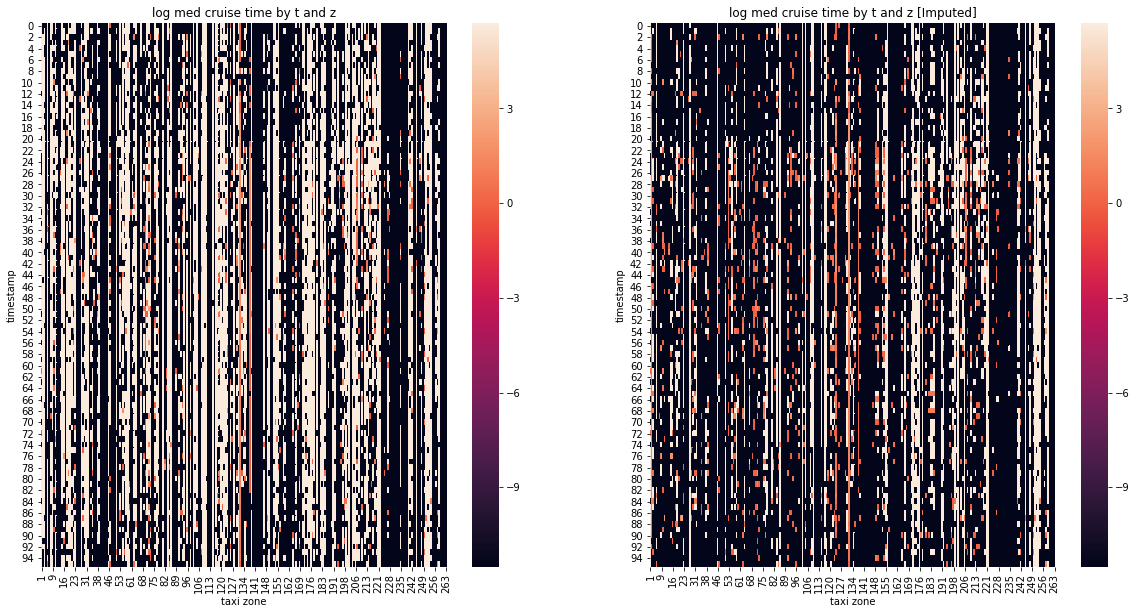

In [5]:
cruise_df = cruise_time_15m.copy()
cruise_df['med_cruise_time_INT'] = np.log(cruise_df['med_cruise_time_INT'] + 1e-5)
cruise_df = cruise_df.pivot_table(index='dropoff_datetime_index', 
                                  columns='taxizone_id', 
                                  values='med_cruise_time_INT')
cruise_df.fillna(np.log(300), inplace=True)

cruise_df_imputed_heatmap = cruise_time_imputed_15m.copy()
cruise_df_imputed_heatmap['med_cruise_time_INT'] = np.log(cruise_df_imputed_heatmap['med_cruise_time_INT'] + 1e-5)
cruise_df_imputed_heatmap = cruise_df_imputed_heatmap\
                        .pivot_table(index='dropoff_datetime_index', 
                                     columns='taxizone_id', 
                                     values='med_cruise_time_INT')
cruise_df_imputed_heatmap.fillna(np.log(300), inplace=True)


fig, ax = plt.subplots(1,2, figsize=(20, 10))
sns.heatmap(cruise_df, ax=ax[0])
ax[0].set_title('log med cruise time by t and z')
ax[0].set_xlabel('taxi zone')
ax[0].set_ylabel('timestamp')

sns.heatmap(cruise_df_imputed_heatmap, ax=ax[1])
ax[1].set_title('log med cruise time by t and z [Imputed]')
ax[1].set_xlabel('taxi zone')
ax[1].set_ylabel('timestamp')
# fig.savefig('../heatmap_cruise_time.png')